# ML-Model

## Data Preparation

In [34]:
import pandas as pd
import random

random.seed(1)
p = 0.1


accidents = pd.read_csv('../data/Accidents0514.csv', header=0, skiprows=lambda i: i>0 and random.random() > p)
vehicles = pd.read_csv('../data/Vehicles0514.csv')

def read_and_join_description(df, col_name):
    col_name_new = col_name.replace('_',' ')
    col_name_new = col_name_new.replace('?','')
    
    col_name_new = col_name_new.replace('Pedestrian Crossing-Human Control','Ped Cross - Human')
    col_name_new = col_name_new.replace('Pedestrian Crossing-Physical Facilities','Ped Cross - Physical')
    col_name_new = col_name_new.replace('Weather Conditions','Weather')
    col_name_new = col_name_new.replace('Road Surface Conditions','Road Surface')
    col_name_new = col_name_new.replace('Urban or Rural Area','Urban Rural')
    col_name_new = col_name_new.replace('Did Police Officer Attend Scene of Accident','Police Officer Attend')
    col_name_new = col_name_new.replace('Pedestrian ','Ped ')
    col_name_new = col_name_new.replace('Bus or Coach Passenger','Bus Passenger')
    col_name_new = col_name_new.replace('Casualty Home Area Type','Home Area Type')
    col_name_new = col_name_new.replace('Vehicle Location-Restricted Lane','Vehicle Location')
    col_name_new = col_name_new.replace('Vehicle Leaving Carriageway','Veh Leaving Carriageway')
    col_name_new = col_name_new.replace('Hit Object off Carriageway','Hit Object Off Carriageway')
    col_name_new = col_name_new.replace('Journey Purpose of Driver','Journey Purpose')
    col_name_new = col_name_new.replace('Age Band of Casualty','Age Band')
    col_name_new = col_name_new.replace('Age Band of Driver','Age Band')
    col_name_new = col_name_new.replace('Propulsion Code','Vehicle Propulsion Code')
    col_name_new = col_name_new.replace('Driver Home Area Type','Home Area Type')
    
    excel_data = pd.read_excel(open('../data/Road-Accident-Safety-Data-Guide.xls', 'rb'),sheet_name=col_name_new) 
    excel_data.columns = excel_data.columns.str.lower()
    excel_data = excel_data.add_prefix(col_name+'_')
    
    final_df = pd.merge(df, excel_data, how = 'left', left_on=col_name, right_on=col_name+'_code')
    final_df.drop([col_name+'_code',col_name], axis=1,inplace=True)
    final_df.columns = final_df.columns.str.replace('_label','')
    return final_df

accidents_full = accidents.copy()

for name in ['Police_Force',
 'Accident_Severity',
 'Day_of_Week',
 'Local_Authority_(District)',
 'Local_Authority_(Highway)',
 '1st_Road_Class',
 'Road_Type',
 'Junction_Detail',
 'Junction_Control',
 '2nd_Road_Class',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident']:
    accidents_full = read_and_join_description(accidents_full, name)
    
vehicles_full = vehicles.copy()

for name in ['Vehicle_Type',
 'Towing_and_Articulation',
 'Vehicle_Manoeuvre',
 'Vehicle_Location-Restricted_Lane',
 'Junction_Location',
 'Skidding_and_Overturning',
 'Hit_Object_in_Carriageway',
 'Vehicle_Leaving_Carriageway',
 'Hit_Object_off_Carriageway',
 '1st_Point_of_Impact',
 'Was_Vehicle_Left_Hand_Drive?',
 'Journey_Purpose_of_Driver',
 'Sex_of_Driver',
 'Age_Band_of_Driver',
 'Propulsion_Code']:
    vehicles_full = read_and_join_description(vehicles_full, name)

C:\Users\AlexB\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Used for ML Model: 

Accidents: Day_of_Week, 1st_Road_Class, Weather_Conditions, Road_Surface_Conditions, Special_Conditions_at_Site, Urban_or_Rural_Area, Time of year (Season), Time of day, Longitude, Latitude

Vehicles: Vehicle Types in Accident

To predict: Accident_Severity


### Vehicles

Since we only use the Type of vehicles included in the accident we need something similar to a one-hot-encoding, since want to reduce multiple vehicles onto one line without including any order or similar.

For simplicity we also reduce the categories a bit.

In [35]:
vehicles_full["Vehicle_Type"].replace({
    "Motorcycle 125cc and under": "Motorcycle 125cc and under", 
    "Motorcycle 50cc and under": "Motorcycle 125cc and under",
    "Motorcycle over 125cc and up to 500cc":"Motorcycle over 125cc",
    "Motorcycle over 500cc": "Motorcycle over 125cc",
    "Taxi/Private hire car": "Car"
}, inplace=True)

In [36]:
df = pd.get_dummies(vehicles_full["Vehicle_Type"])
vehicles_oh = pd.concat([df, vehicles_full["Accident_Index"]], axis=1) 
vehicles_oh = vehicles_oh.groupby("Accident_Index",as_index=False).sum()
vehicles_oh.set_index("Accident_Index", inplace=True)
vehicles_oh.drop("Data missing or out of range", axis=1, inplace=True) #drop missing data column, will be represented as all 0

In [37]:
vehicles_oh.head()

,Agricultural vehicle,Bus or coach (17 or more pass seats),Car,Electric motorcycle,Goods 7.5 tonnes mgw and over,Goods over 3.5t. and under 7.5t,Goods vehicle - unknown weight,Minibus (8 - 16 passenger seats),Mobility scooter,Motorcycle - unknown cc,Motorcycle 125cc and under,Motorcycle over 125cc,Other vehicle,Pedal cycle,Ridden horse,Tram,Van / Goods 3.5 tonnes mgw or under
Accident_Index,,,,,,,,,,,,,,,,,
200501BS00001,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
200501BS00002,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
200501BS00003,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
200501BS00004,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
200501BS00005,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### Accidents

In [38]:
accidents_full.set_index("Accident_Index", inplace=True)
accidents_prep = accidents_full.copy()[["Accident_Severity","Day_of_Week", "1st_Road_Class", "Weather_Conditions", "Road_Surface_Conditions", "Special_Conditions_at_Site", "Urban_or_Rural_Area", "Date", "Time", "Longitude", "Latitude"]]

Get Day time from hour

In [39]:
def getDayTime(hour):
    if hour >= 5 and hour < 11:
        return "morning (5-11)"
    elif hour >= 11 and hour < 14:
        return "midday (11-14)"
    elif hour >= 14 and hour < 18:
        return "afternoon (16-18)"
    elif hour >= 17 and hour < 23:
        return "evening (18-23)"
    else:
        return "night (23-5)"

accidents_prep['hour'] = accidents_prep['Time'].str[0:2]
accidents_prep['hour'] = pd.to_numeric(accidents_prep['hour'])
accidents_prep = accidents_prep.dropna(subset=['hour'])
accidents_prep['hour'] = accidents_prep['hour'].astype('int')

accidents_prep['Daytime'] = accidents_prep['hour'].apply(getDayTime)
accidents_prep.drop(["hour","Time"], axis=1, inplace=True)

Get Season from Date

In [40]:
accidents_prep['accident_date'] = pd.to_datetime(accidents_prep['Date'])
accidents_prep['Season']=accidents_prep['accident_date'].dt.month%12 // 3 + 1
accidents_prep.drop(['Date','accident_date'], axis=1, inplace=True)

accidents_prep["Season"].replace({
    1: "Spring", 
    2: "Summer",
    3: "Autumn",
    4: "Winter"
}, inplace=True)

In [41]:
accidents_prep.head()

,Accident_Severity,Day_of_Week,1st_Road_Class,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Urban_or_Rural_Area,Longitude,Latitude,Daytime,Season
Accident_Index,,,,,,,,,,,
200501BS00010,Slight,Saturday,A,Fine no high winds,Dry,None,Urban,-0.167342,51.483420,evening (18-23),Spring
200501BS00011,Slight,Saturday,B,Fine no high winds,Dry,None,Urban,-0.206531,51.512443,afternoon (16-18),Spring
200501BS00016,Slight,Tuesday,A,Raining no high winds,Wet or damp,None,Urban,-0.157753,51.492622,morning (5-11),Spring
200501BS00022,Serious,Saturday,A,Fine no high winds,Dry,None,Urban,-0.174925,51.495498,night (23-5),Autumn
200501BS00023,Slight,Monday,Unclassified,Fine no high winds,Dry,None,Urban,-0.187270,51.492992,evening (18-23),Spring


### Join

In [46]:
df = accidents_prep.join(vehicles_oh)

In [47]:
df.head()

,Accident_Severity,Day_of_Week,1st_Road_Class,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Urban_or_Rural_Area,Longitude,Latitude,Daytime,...,Minibus (8 - 16 passenger seats),Mobility scooter,Motorcycle - unknown cc,Motorcycle 125cc and under,Motorcycle over 125cc,Other vehicle,Pedal cycle,Ridden horse,Tram,Van / Goods 3.5 tonnes mgw or under
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00010,Slight,Saturday,A,Fine no high winds,Dry,None,Urban,-0.167342,51.483420,evening (18-23),...,0,0,0,0,0,0,0,0,0,0
200501BS00011,Slight,Saturday,B,Fine no high winds,Dry,None,Urban,-0.206531,51.512443,afternoon (16-18),...,0,0,0,0,0,1,0,0,0,0
200501BS00016,Slight,Tuesday,A,Raining no high winds,Wet or damp,None,Urban,-0.157753,51.492622,morning (5-11),...,0,0,0,0,0,0,0,0,0,0
200501BS00022,Serious,Saturday,A,Fine no high winds,Dry,None,Urban,-0.174925,51.495498,night (23-5),...,0,0,0,0,0,0,0,0,0,0
200501BS00023,Slight,Monday,Unclassified,Fine no high winds,Dry,None,Urban,-0.187270,51.492992,evening (18-23),...,0,0,0,1,0,0,0,0,0,0


Drop 31 rows with NA locations

In [48]:
df = df.dropna()

## Training of Modell

Due to the setup of the data we decided to only compare randomForest and naivBayes classifiers. With this size of Data a neural network might be promising too but is this can be done at a later point.

In [68]:
# get necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from matplotlib import pyplot as plt
import numpy as np

First split into train and test, scaling not necessary since the data does not need it (latitude and longitude are on the same scale, the dummy vehicles too)

In [50]:
X = df.iloc[:, 1:]
X = pd.get_dummies(data=X)
y = df["Accident_Severity"]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=1, 
                                                    stratify=y)

### RandomForest

In [52]:
param_grid = {'n_estimators': np.arange(50, 201, 50).tolist()}

rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs=8)

In [53]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'n_estimators': [50, 100, 150, 200]})

In [54]:
allscores=grid_search.cv_results_['mean_test_score']
print(allscores)

[0.83883554 0.84099223 0.84097699 0.8415333 ]


In [55]:
grid_search.best_estimator_

RandomForestClassifier(n_estimators=200)

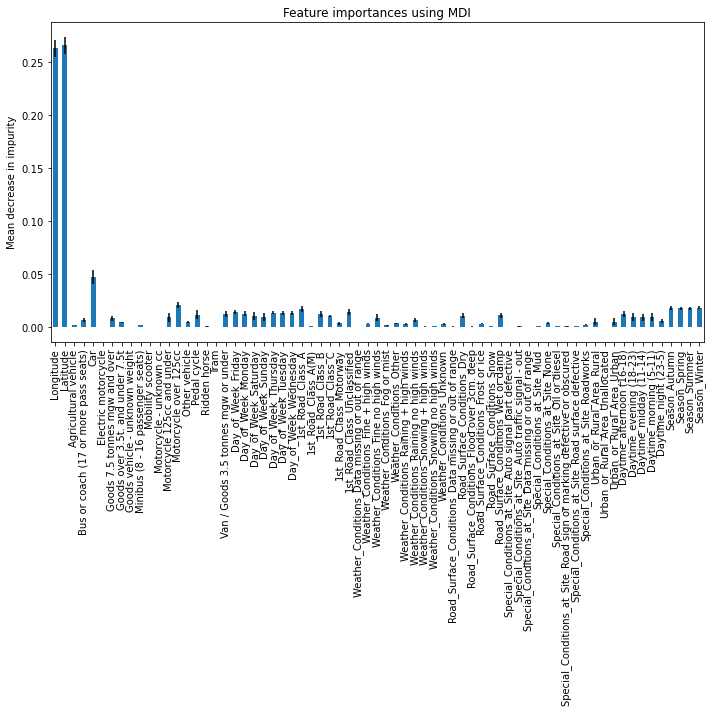

In [67]:
importances = grid_search.best_estimator_.feature_importances_
feature_names = X.columns.tolist()
std = np.std([tree.feature_importances_ for tree in grid_search.best_estimator_.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax, figsize=(10,10))
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### KNN

KNeighborsClassifier(metric='euclidean')
0.831372309943303
KNeighborsClassifier(metric='euclidean', n_neighbors=6)
0.8258245442906785
KNeighborsClassifier(metric='euclidean', n_neighbors=7)
0.8408522831189417
KNeighborsClassifier(metric='euclidean', n_neighbors=8)
0.8371944156556728
KNeighborsClassifier(metric='euclidean', n_neighbors=9)
0.8446015972687922
KNeighborsClassifier(metric='euclidean', n_neighbors=10)
0.8437176126318356
KNeighborsClassifier(metric='euclidean', n_neighbors=11)
0.84713162226422
KNeighborsClassifier(metric='euclidean', n_neighbors=12)
0.8466134243735902
KNeighborsClassifier(metric='euclidean', n_neighbors=13)
0.8488691093092727
KNeighborsClassifier(metric='euclidean', n_neighbors=14)
0.848991038224715


ValueError: x and y must have same first dimension, but have shapes (69,) and (10,)

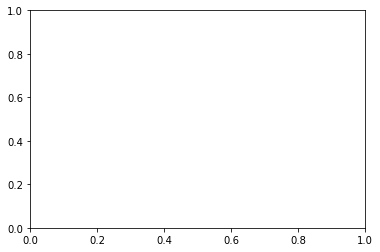

In [70]:
accuracies = []

for i in range(5, 15):
    classifier = KNeighborsClassifier(n_neighbors = i, metric = 'euclidean')
    print(classifier)
    classifier.fit(X_train, np.ravel(y_train))
    pred_i = classifier.predict(X_test)
    print(np.mean(pred_i ==np.ravel(y_test)))
    accuracies.append(np.mean(pred_i ==np.ravel(y_test)))

In [74]:
classifier = KNeighborsClassifier(n_neighbors = 13, metric = 'euclidean')
classifier.fit(X_train, np.ravel(y_train))

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

### NaiveBayes

## Store model

To use the model later in the container we store it via pickle on the hard drive

In [75]:
import pickle
import joblib

filename = '../backend/model/finalized_model.pkl'

joblib.dump(classifier, filename,compress=9)

['../backend/model/finalized_model.pkl']

Test if reading it works:

In [76]:
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.8488691093092727
